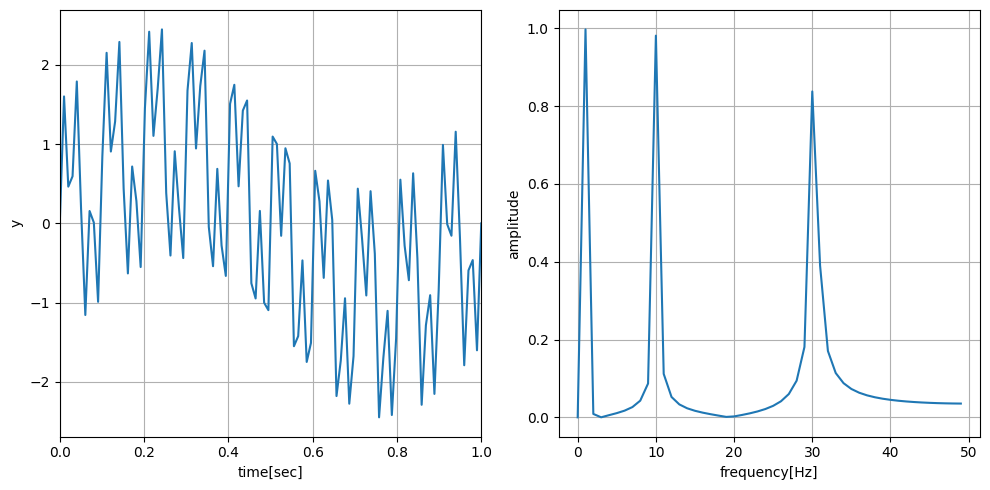

In [3]:
# ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

# 計測パラメータ設定
Fs = 100  # サンプリングレート[Hz]
T = 1     # 測定時間[s]

# 信号作成
F = [10, 1, 30] # 周波数[Hz]
A = np.ones(len(F)) # 振幅はとりえあず全て1で揃える

# 時間領域データの作成 = 正弦波の重ね合わせ
t = np.linspace(0.0, T, T*Fs)
y = np.zeros(T*Fs)
for a, f in zip(A, F):
    y = y + a*np.sin(2.0*np.pi*f*t)


# 周波数領域データの作成
#    時間領域データにFFT処理を加え、周波数領域データを生成
Fk = np.fft.fft(y)/ (len(y)/2.0)        # 縦軸: スペクトル(複素数)
freq = np.fft.fftfreq(len(y), d=1.0/Fs) # 横軸

# 得られた周波数領域データから、プロットするための振幅スペクトルを計算(0～Fs/2)
#    (注意)ナイキストの定理により、周波数の横軸の幅は元のデータのサンプリングレートの半分(ナイキスト周波数)となる。
#    ここで、abs()は複素数の絶対値を計算する関数で、スペクトルFkの絶対値をとることにより振幅スペクトルを計算できる。
#    なお、パワースペクトルは振幅スペクトルの2乗で計算できる。エネルギーはパワースペクトルの積分で計算できる。
amp = np.abs(Fk[(freq>=0) & (freq<=Fs/2)]) # 振幅スペクトルをナイキスト周波数の範囲で計算
f = freq[(freq>=0) & (freq<=Fs/2)] # 横軸をナイキスト周波数の範囲で設定

# プロット作成
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 時間領域データのプロット
axs[0].plot(t, y)
axs[0].set_xlabel("time[sec]")
axs[0].set_ylabel("y")
axs[0].set_xlim(0,1)
axs[0].grid()

# 周波数領域データ(振幅スペクトル)のプロット
axs[1].plot(f,amp)
axs[1].set_xlabel("frequency[Hz]")
axs[1].set_ylabel("amplitude")
axs[1].grid()

plt.tight_layout()
plt.show()
